In [1]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm,colors
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import community

# dataの読み込み

In [2]:
########################
# 課題2-1：異なるデータセットに対して実行
########################
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
# True labels of the group each student (node) unded up in. Found via the original paper
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [3]:
########################
# 課題2-2：knnグラフを構築
########################

In [4]:
def draw_communities(G, membership, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    membership : list
        A list where the position is the student and the value at the position is the student club membership.
        E.g. `print(membership[8]) --> 1` means that student #8 is a member of club 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    # Normalize number of clubs for choosing a color
    norm = colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


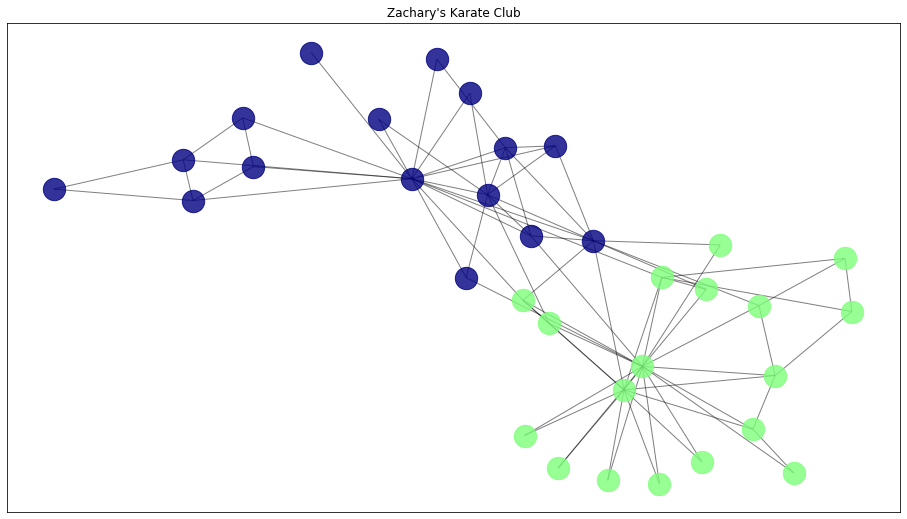

In [5]:
draw_communities(G, y_true, pos)

# 隣接行列の作成

In [6]:
def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explaination on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat

In [7]:
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [8]:
results = []

## Modularity (louvain)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

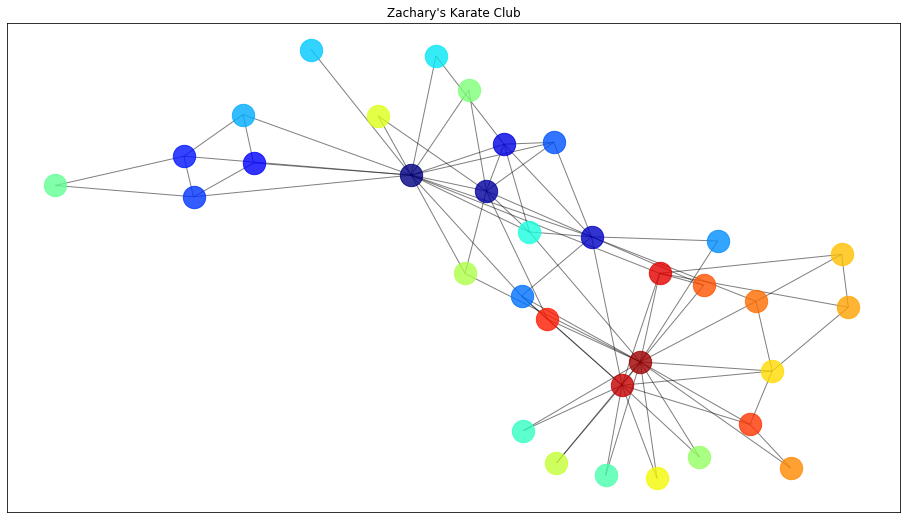

In [9]:
##################
# 課題1-1：Modurarityの実装
partition = community.best_partition(G)
##################

results.append(partition)
draw_communities(G, partition, pos)

## symNMF

In [10]:
import sys
import numpy as np
import scipy.io as sio
import scipy.sparse as sp



def update_V(A,V):
    V_new = V*((A.dot(V)+A.transpose().dot(V))/(2*V.dot(V.transpose().dot(V)))) # this updating rule from partial differential
    return V_new

def removing_nan(mat):
    nan_list = np.argwhere(np.isnan(mat))
    for i in nan_list:
        mat[i[0],i[1]]=sys.float_info.epsilon
    return mat

def symNMF(edge_mat, k=2):
    A = edge_mat
    node_size = A.shape[0]

    #initalize matrices
    V = np.random.random((node_size,k)) # V <- random
    max_iter=100



    #training step
    count = 0
    while 1:
        count += 1

        V = removing_nan(update_V(A,V))

        if count>=max_iter:
            break

    #predicting step
    pred=[]

    for i in range(len(V)):
        pred.append(np.argmax(V[:][i]))

    return pred

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


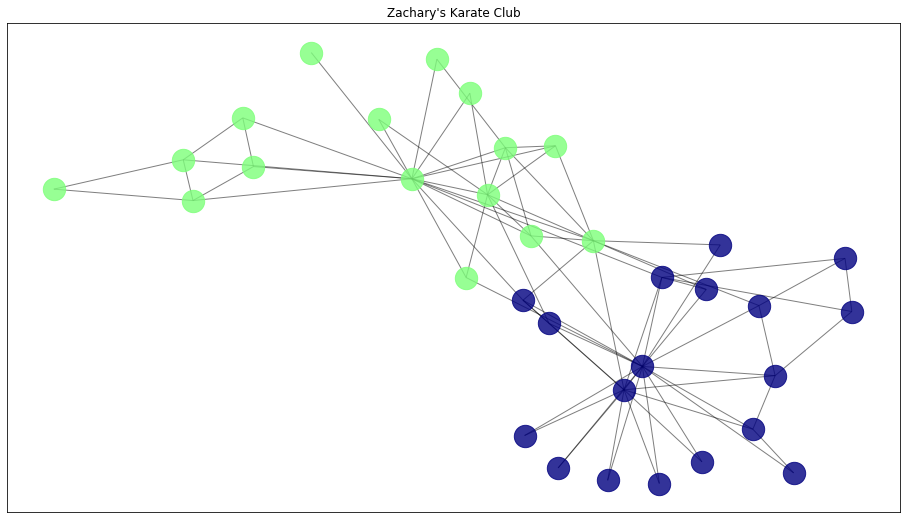

In [11]:
##################
# 課題1-2：symNMFの実装
pred_symNMF = symNMF(edge_mat)

results.append(pred_symNMF)
draw_communities(G, pred_symNMF, pos)

## SCAN

In [12]:
from collections import deque
import numpy as np
from scipy.sparse import csr_matrix

def struct_similarity(vcols, wcols):
    """ Compute the similartiy normalized on geometric mean of vertices"""
    # count the similar rows for unioning edges
    count = [index for index in wcols if (index in vcols)]
    # geomean
    #need to account for vertex itself, add 2(1 for each vertex)
    ans = (len(count) +2) / (((vcols.size+1)*(wcols.size+1)) ** .5)
    return ans

def neighborhood(G, vertex_v, eps):
    """ Returns the neighbors, as well as all the connected vertices """
    N = deque()
    vcols = vertex_v.tocoo().col
    #check the similarity for each connected vertex
    for index in vcols:
        wcols = G[index,:].tocoo().col
        if struct_similarity(vcols, wcols)> eps:
            N.append(index)
    return N, vcols

def scan(G, eps =0.7, mu=2):
    """
    Vertex Structure = sum of row + itself(1)
    Structural Similarity is the geometric mean of the 2Vertex size of structure
    """
    
    c = 0
    v = G.shape[0]
    # All vertices are labeled as unclassified(-1)
    vertex_labels = -np.ones(v)
    # start with a neg core(every new core we incr by 1)
    cluster_id = -1
    for vertex in range(v):
        N ,vcols = neighborhood(G, G[vertex,:], eps)
        # must include vertex itself
        N.appendleft(vertex)
        if len(N) >= mu:
            #print "we have a cluster at: %d ,with length %d " % (vertex, len(N))
            # gen a new cluster id (0 indexed)
            cluster_id +=1
            while N:
                y = N.pop()
                R , ycols = neighborhood(G, G[y,:], eps)
                 # include itself
                R.appendleft(y)
                 # (struct reachable) check core and if y is connected to vertex
                if len(R) >= mu and y in vcols:
                     #print "we have a structure Reachable at: %d ,with length %d " % (y, len(R))
                    while R:
                        r = R.pop()
                        label = vertex_labels[r]
                         # if unclassified or non-member
                        if (label == -1) or (label==0): 
                            vertex_labels[r] =  cluster_id
                         # unclassified ??
                        if label == -1:
                            N.appendleft(r)
        else:
            vertex_labels[vertex] = 0
    
    #classify non-members
    for index in np.where(vertex_labels ==0)[0]:
        ncols= G[index,:].tocoo().col
        if len(ncols) >=2:
            ## mark as a hub
            vertex_labels[index] = -2 
            continue
            
        else:
            ## mark as outlier
            vertex_labels[index] = -3
            continue

    return vertex_labels


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

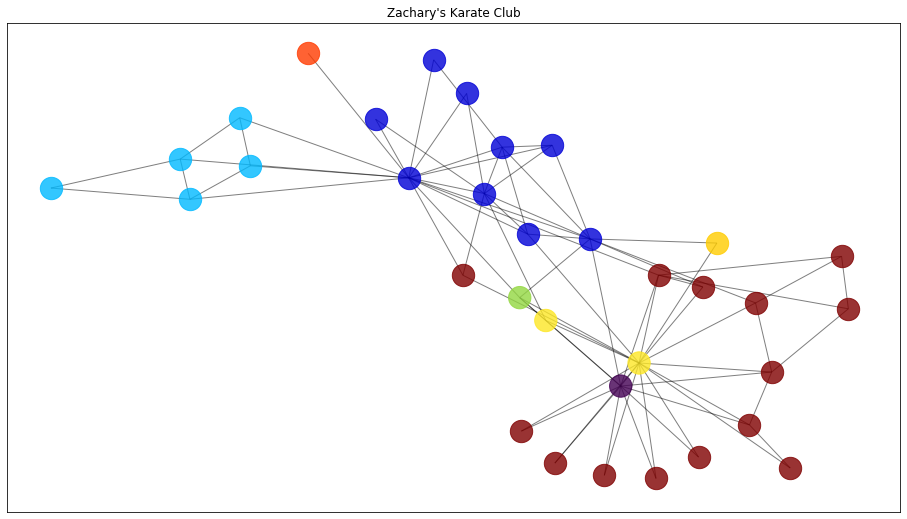

In [13]:
##################
# 課題1-3：SCANの実装
pred_scan = scan(csr_matrix(edge_mat))
##################

results.append(pred_scan)
draw_communities(G, pred_scan, pos)

# 評価

In [14]:
nmi_results = []
ars_results = []

# Append the results into lists
for y_pred in results:
    if type(y_pred) == dict:
        nmi_results.append(normalized_mutual_info_score(y_true, list(y_pred.values())))
        ars_results.append(adjusted_rand_score(y_true, list(y_pred.values())))
    else:
        nmi_results.append(normalized_mutual_info_score(y_true, y_pred))
        ars_results.append(adjusted_rand_score(y_true, y_pred))

/anaconda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [15]:
nmi_results

[0.6390737227296129, 1.0, 0.5591665174187932]

In [16]:
ars_results

[0.5126541958649447, 1.0, 0.242914979757085]

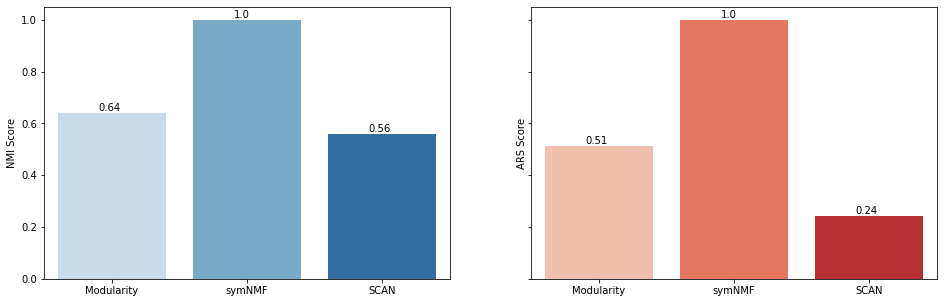

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 5))

x = np.arange(len(y_true))

xlabels = ["Modularity", "symNMF", "SCAN"]

sns.barplot(x=xlabels,y=np.array(nmi_results), palette='Blues', ax=ax1)
sns.barplot(x=xlabels,y=np.array(ars_results), palette='Reds', ax=ax2)

ax1.set_ylabel('NMI Score')
ax2.set_ylabel('ARS Score')

# # Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_results, ars_results)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))

# Show the final plot
plt.savefig("score.png")
plt.show()

### Q2. knnグラフを用いたクラスタリング

In [47]:
G.node

NodeView(('BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCa

In [49]:
np.arange(len(G))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [50]:
edge_mat.shape

(115, 115)

In [22]:
try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

In [37]:
def graph_to_edge_matrix_new(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explaination on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)
    
    uni_map = dict(zip(G.node, np.arange(len(G))))
    
    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[uni_map[node]][uni_map[neighbor]] = 1
        edge_mat[uni_map[node]][uni_map[node]] = 1

    return edge_mat

In [42]:
pos = nx.spring_layout(G)
pos = dict(zip(np.arange(len(G)), pos.values()))
edge_mat = graph_to_edge_matrix_new(G)

/anaconda/lib/python3.6/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in

KeyError: 'BrighamYoung'

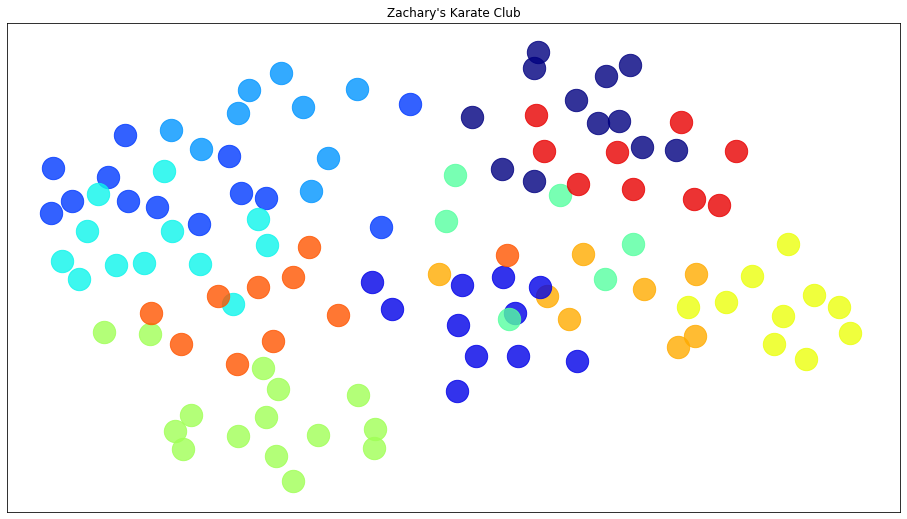

In [43]:
knn_clustering = cluster.SpectralClustering(n_clusters=11, random_state=42, n_neighbors=5)

knn_clustering.fit(edge_mat)
knn_labels = knn_clustering.labels_
draw_communities(G, knn_labels, pos)

### knnグラフを使わない方法との比較

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

KeyError: 'BrighamYoung'

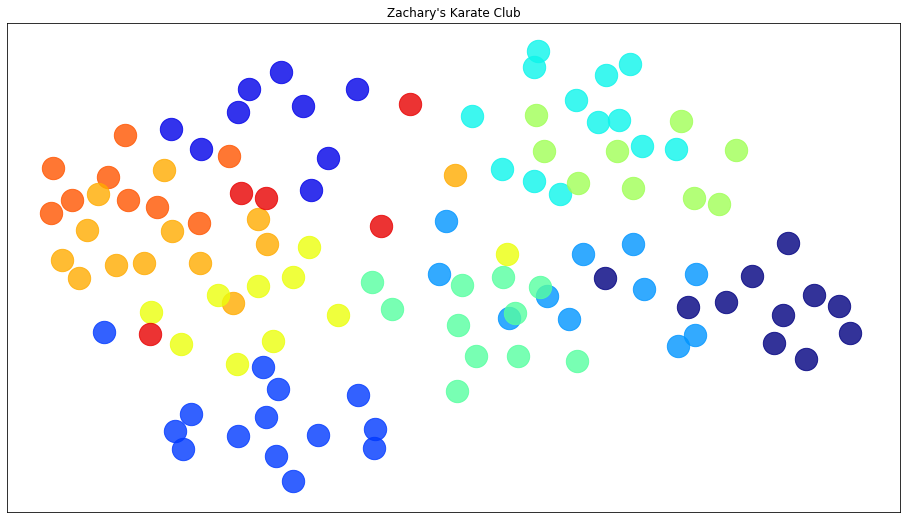

In [46]:
pred_symNMF = symNMF(edge_mat, k=11)

draw_communities(G, pred_symNMF, pos)

### 両者を比較するとknnグラフを用いたものの方が全体としてまとまりがあるように見える